### Define RUL Thresholds for Alert Levels

- This notebook focuses on defining and documenting the Remaining Useful Life (RUL) threshold values that will form the basis for risk alerting.

- Load sample RUL prediction data or synthetic RUL range to explore value distribution.

- Define thresholds for maintenance alert levels:

  - Normal: RUL above warning threshold (safe zone)

  - Warning: RUL between warning and critical thresholds (maintenance soon)

  - Critical: RUL below critical threshold (immediate maintenance)

- Rationale: thresholds should balance early failure detection with avoiding excessive false alarms.

- Document threshold values and justification for later integration into alerting logic.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Example: Load or simulate RUL prediction data
rul_values = np.linspace(0, 130, 131)

# Define thresholds (example values from mentor)
warning_threshold = 50     # maintenance soon
critical_threshold = 20    # immediate maintenance


In [3]:
# Function to categorize RUL risk levels
def categorize_rul(rul, warning_thresh, critical_thresh):
    if rul <= critical_thresh:
        return 'Critical'
    elif rul <= warning_thresh:
        return 'Warning'
    else:
        return 'Normal'

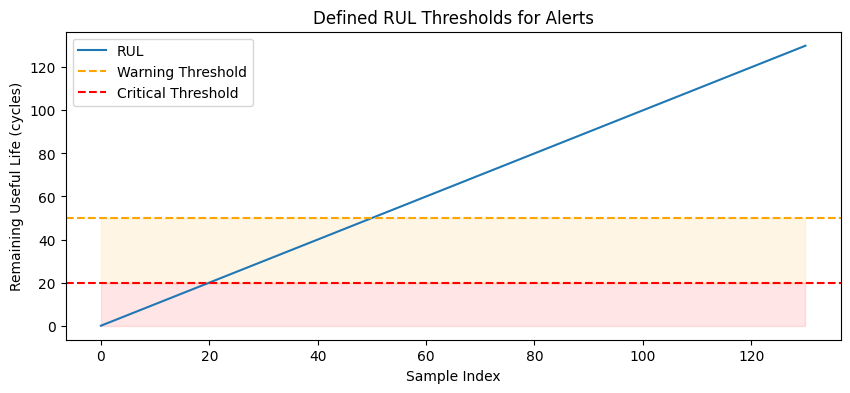

In [4]:
# Apply categorization across RUL values
rul_categories = [categorize_rul(rul, warning_threshold, critical_threshold) for rul in rul_values]

# Quick visualization of threshold zones 
plt.figure(figsize=(10, 4))
plt.plot(rul_values, rul_values, label='RUL')
plt.axhline(y=warning_threshold, color='orange', linestyle='--', label='Warning Threshold')
plt.axhline(y=critical_threshold, color='red', linestyle='--', label='Critical Threshold')
plt.fill_between(rul_values, 0, critical_threshold, color='red', alpha=0.1)
plt.fill_between(rul_values, critical_threshold, warning_threshold, color='orange', alpha=0.1)
plt.xlabel('Sample Index')
plt.ylabel('Remaining Useful Life (cycles)')
plt.title('Defined RUL Thresholds for Alerts')
plt.legend()
plt.show()

In [5]:
# Document threshold values and rationale
print(f"Warning Threshold: {warning_threshold} cycles - signals maintenance soon")
print(f"Critical Threshold: {critical_threshold} cycles - signals immediate maintenance required")

Warning Threshold: 50 cycles - signals maintenance soon
Critical Threshold: 20 cycles - signals immediate maintenance required


- Task: Implement this on 'sequence_metadata_with_RUL' csv file and plot the threshold zones.

In [10]:
import os

folder = r"D:\PROGONSAI\milestone_2\week_4\Day_16"
print(os.listdir(folder))


['.gitignore', 'best_model.keras', 'LSTM_types.ipynb', 'rolling_window_sequences.npy', 'rolling_window_sequences_float32.npy', 'sequence_metadata_with_RUL.csv']


In [11]:
rul_df = pd.read_csv(
    r"D:\PROGONSAI\milestone_2\week_4\Day_16\sequence_metadata_with_RUL.csv"
)

rul_values = rul_df['RUL']
rul_df.head()


,engine_id,cycle,max_cycle_x,RUL,max_cycle_y,max_cycle_new
0,1,8.0,321.0,313.0,321.0,321.0
1,1,8.0,321.0,313.0,321.0,321.0
2,1,9.0,321.0,312.0,321.0,321.0
3,1,9.0,321.0,312.0,321.0,321.0
4,1,9.0,321.0,312.0,321.0,321.0


In [12]:
rul_categories = [
    categorize_rul(r, warning_threshold, critical_threshold)
    for r in rul_values
]

len(rul_categories)


152559

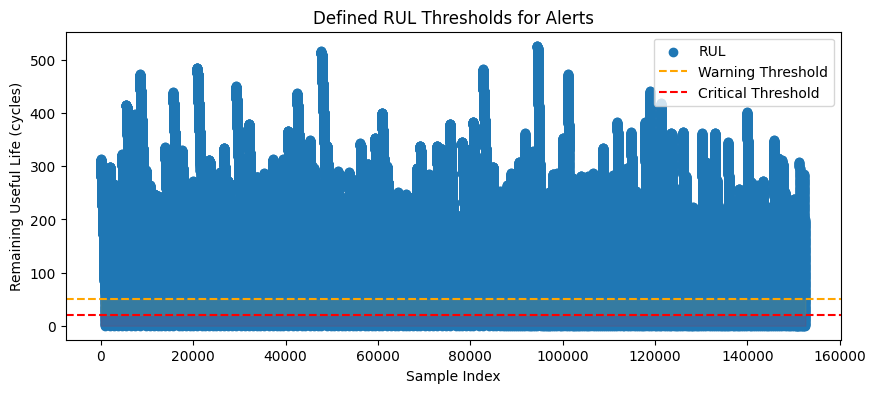

In [13]:
plt.figure(figsize=(10, 4))
plt.scatter(range(len(rul_values)), rul_values, label="RUL")

# threshold lines
plt.axhline(y=warning_threshold, color='orange', linestyle='--', label='Warning Threshold')
plt.axhline(y=critical_threshold, color='red', linestyle='--', label='Critical Threshold')

# color zones shading
plt.fill_between(range(len(rul_values)), 0, critical_threshold, color='red', alpha=0.1)
plt.fill_between(range(len(rul_values)), critical_threshold, warning_threshold, color='orange', alpha=0.1)

plt.xlabel("Sample Index")
plt.ylabel("Remaining Useful Life (cycles)")
plt.title("Defined RUL Thresholds for Alerts")
plt.legend()
plt.show()


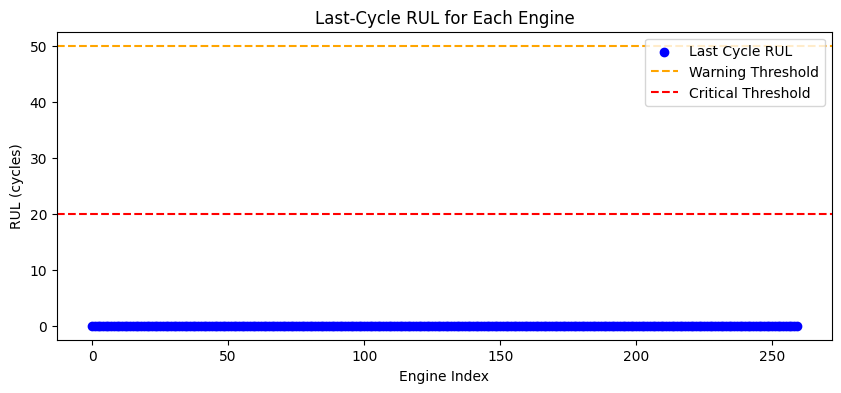

In [15]:
last_cycle_rul = []

for eng in rul_df["engine_id"].unique():
    last_idx = rul_df.loc[rul_df["engine_id"] == eng].index.max()
    last_cycle_rul.append(rul_df.loc[last_idx, "RUL"])

last_cycle_rul = np.array(last_cycle_rul)

plt.figure(figsize=(10,4))
plt.scatter(range(len(last_cycle_rul)), last_cycle_rul, c='blue', label='Last Cycle RUL')

plt.axhline(y=warning_threshold, color='orange', linestyle='--', label='Warning Threshold')
plt.axhline(y=critical_threshold, color='red', linestyle='--', label='Critical Threshold')

plt.title("Last-Cycle RUL for Each Engine")
plt.xlabel("Engine Index")
plt.ylabel("RUL (cycles)")
plt.legend()
plt.show()


In [14]:
sample_df = pd.DataFrame({
    "RUL": rul_values[:20],
    "Category": rul_categories[:20]
})

sample_df


,RUL,Category
0,313.0,Normal
1,313.0,Normal
2,312.0,Normal
3,312.0,Normal
4,312.0,Normal
5,312.0,Normal
6,311.0,Normal
7,311.0,Normal
8,311.0,Normal
9,311.0,Normal
